In [50]:
%matplotlib inline
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import matplotlib.pyplot as plt

In [51]:
### Read SQLite DB into pandas dataframe and parse dates
import sqlite3
conn = sqlite3.connect('online-minutes-with-gaps.db')
df = pd.read_sql_query("SELECT * FROM UTCReadings", conn)
# CREATE TABLE UTCReadings ( EPOCHTIME integer primary key, VALUE integer not null );

In [52]:
### Convert epoch time (in seconds) to datetime. Convert value to kwh.
df['date'] = pd.to_datetime(df['EPOCHTIME'], unit='s')
df['kwh'] = df['VALUE'].astype(float) / 60000
del df['EPOCHTIME']
del df['VALUE']
#df

In [53]:
### Make date the index
ts = df.set_index(['date'])
#ts

In [54]:
### Reindex to have cover full month and fill wiht n/a values.
ts = ts.reindex(pd.date_range('2014-11-01','2016-07-31',freq='1T'))
ts = ts.fillna(method='pad')
#ts

In [55]:
### Resamle and sum per month
ts.resample('1M').sum()

,kwh
2014-11-30,559.034502
2014-12-31,826.687810
2015-01-31,870.463321
2015-02-28,801.259967
2015-03-31,1041.140830
2015-04-30,758.155005
2015-05-31,1089.346413
2015-06-30,977.875885
2015-07-31,1245.683031
2015-08-31,846.928878


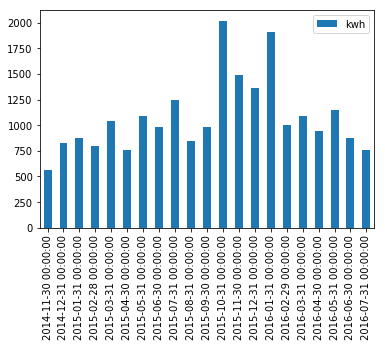

In [56]:
### Plot power consumption histogram per day/week/month
#ts.resample('1D').sum().plot(kind='bar')
#ts.resample('1W').sum().plot(kind='bar')
ts.resample('1M').sum().plot(kind='bar')